In [361]:
import numpy as np
from matplotlib import pyplot as plt

In [362]:
def genpoints(x=(-1,1),y=(-1,1),N=10):
    """Generates the random points
    """
    X = np.random.uniform(x[0],x[1],N)
    Y = np.random.uniform(y[0],y[1],N)
    return np.vstack((X,Y)).T

In [363]:
def shot(points,center,R):
    """Plots the points and the circle
    """
    for i in range(len(points)):
        plt.plot(points[i,0],points[i,1],'bo')
    circle(center,R)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [364]:
def circle(center,R):
    """Plots the given circle
    """
    circ=plt.Circle(center, radius=R, color='g', fill=False)
    plt.gca().add_patch(circ)
    plt.axis('scaled')
    #plt.axis([-1, 1, -1, 1])

In [365]:
def checkinside(point,center,R):
    """Checks is the point is inside the ball.
    Works for any dimension
    """
    return sum(np.square(np.subtract(point,center))) <= R*R

In [366]:
class D:
    def __init__(self,r=0,c=(0,0)):
        self.R = r;
        self.center = c   

In [367]:
def cir3(p1,p2,p3):  
    x, y, z = complex(p1[0],p1[1]), complex(p2[0],p2[1]), complex(p3[0],p3[1])
    w = z-x
    w /= y-x
    c = (x-y)*(w-abs(w)**2)/2j/w.imag-x
    return (-c.real, -c.imag), abs(c+x)

In [368]:
def calcDiskDirectly(R):
    n = len(R)
    if n == 0:
        return D()
    elif n == 1:
        return D(0,R[0])
    elif n == 2:
        return D(np.sqrt((R[0][0]-R[1][0])**2 + (R[0][1]-R[1][1])**2)/2,((R[0][0]+R[1][0])/2,(R[0][1]+R[1][1])/2))
    elif n == 3:
        c,r = cir3(R[0],R[1],R[2])
        return D(r,c)
    else:
        print("error!!!")

In [369]:
def sed(P,R): 
    if (len(P)== 0 or len(R) == 3):
         d = calcDiskDirectly(R)
    else:
        rax = np.random.randint(len(P))
        temp = list(P)
        del temp[rax]
        d = sed(temp, R);
        if (not checkinside(P[rax],d.center,d.R)):
            temp2 = list(R)
            temp2.append(P[rax])
            d = sed(temp, temp2);
        #shot(np.array(P),d.center,d.R)
    return d

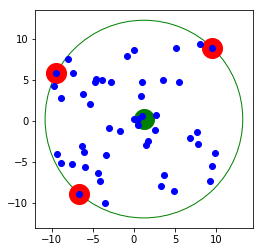

In [379]:
points = genpoints((-10,10),(-10,10),50)
R=[]
d = sed(points,R)
plt.plot(d.center[0],d.center[1],'go',markersize=20)
for i in points:
    if(not checkinside(i,d.center,d.R)):
        plt.plot(i[0],i[1],'ro',markersize=20)
shot(points,d.center,d.R)